## Import Data
Import hist.b which is a dictionary with elm ids as keys and density for every hour (0 to 23) over the course of a year

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import marshal
import pickle
import datetime as dt


%matplotlib inline 
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15, 6

In [18]:
data = marshal.load(open('hist.b', 'rb'))

## Hourly Occupancy (yearly)
Flatten data for blocks into one sum of all occupancies in the year based off hour

In [19]:
# get hourly stats ofr all blocks
hourly = np.array(data.values())
hourly.shape

# flatten this to generaliza all of seattle (one row 23 cols)
hr_density = np.sum(hourly, axis=0)
print hr_density

[   4050    6299    6216    7756   13194   68310  177399  390809  826778
 1246186 1553087 1749109 1836743 1739042 1527764 1371582 1315480 1098710
 1127592  453698     367     403    1929       0]


In [26]:
x = range(len(hr_density)) # 0 to 24
x_label = [dt.time(i).strftime('%I %p') for i in range(24)]

plt.bar(x, hr_density/1000000., color="cyan", tick_label=x_label )
plt.xticks(rotation=70)
plt.ylabel('Yearly Occupancy (million cars)')
plt.xlabel('Time of Day')
plt.title('Occupancy vs Hour')
plt.show()

AttributeError: 'module' object has no attribute 'day'

Chart above shows total load on seattle parking per hr over the year

## Location Based Occupancy (yearly traffic)

create a dict {element_id : yearly traffic}


In [21]:
occupancy = dict()
for elm_id, occs in data.iteritems():
    occupancy[elm_id] = sum(occs)
    
marshal.dump(occupancy, open('occupancy_by_location.b', 'wb'))

### Show popularity of each element id
ids randomly remaped from 0 to num of ids to simplify x axis

Also normalizing occupancies to simplify y axis

 mean :	10963.837425
 sdev :	8901.894176
 min :	1.000000
 max :	89047.000000


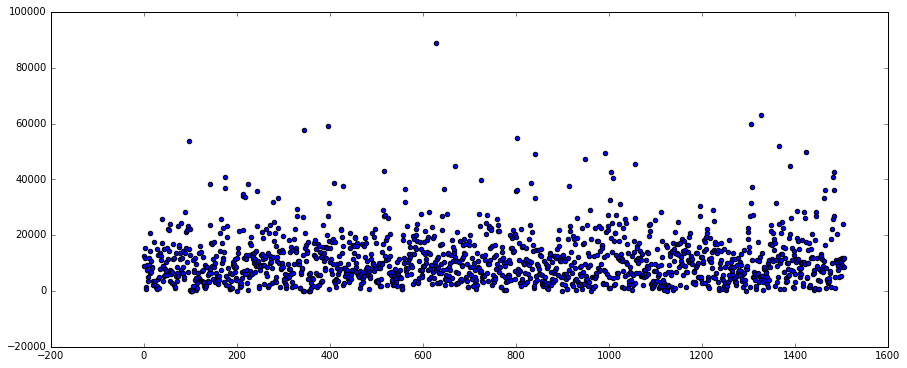

In [22]:
o = np.array(occupancy.values())
o_mean = np.mean(o); o_std = np.std(o) 
x = range(len(occupancy.keys()))
o_norm = (o - o_mean)/o_std

plt.scatter(x, o)


print ' mean :\t%f\n sdev :\t%f\n min :\t%f\n max :\t%f' % (o_mean, o_std, min(o), max(o))

### Box plot
to understand distribution

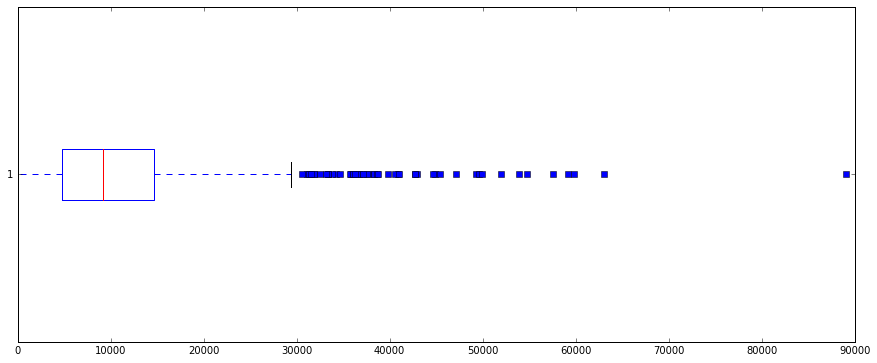

In [23]:
plt.boxplot(o, 0, 'rs', 0)
plt.show()

### Show results on Map
Show a line for every paystation that is colored based off the yearly traffic


In [24]:
# Choose color of line based off occupancy
clr_pal = ['#00cc66', '#ffff00', '#ff9933', '#ff5050', '#cc0000']
def choose_color(number):
    if number < 15000: return clr_pal[0] # green
    elif 15000 <= number < 25000: return clr_pal[1] # yellow
    elif 25000 <= number < 35000: return clr_pal[2] # orange
    elif 35000 <= number < 45000: return clr_pal[3] # red
    elif 45000 <= number: return clr_pal[4] # dark red
    else : print 'Not mapped to color!'
        
# Draw map lines
import gmplot # you need to install this from the above link
gmap=gmplot.GoogleMapPlotter(47.6097,-122.3331,15) # this centers the map in seattle
def draw_blocks(coords, clr):
    gmap.polygon([coords[1],coords[3]],[coords[0], coords[2]],color=clr,edge_width=2)
        

# Get coords for each elm id, then draw
id_coords=pickle.load(open('usedblocks.p','rb')) # load location data
for elm_id, occ in occupancy.iteritems():
    try:
        coords = id_coords[elm_id]
        clr = choose_color(elm_id)
        print elm_id,clr
        draw_blocks(coords, clr)
    except:
        print 'ID: %d not found' % elm_id


# Save HTML
fname = 'popularity.html'
gmap.draw("../html/" + fname)

57349 #cc0000
57350 #cc0000
57353 #cc0000
57354 #cc0000
35501 #ff5050
35502 #ff5050
57377 #cc0000
57382 #cc0000
57386 #cc0000
8242 #00cc66
65545 #cc0000
8249 #00cc66
65546 #cc0000
41030 #ff5050
82014 #cc0000
8301 #00cc66
8302 #00cc66
8305 #00cc66
8306 #00cc66
32909 #ff9933
32910 #ff9933
57513 #cc0000
57517 #cc0000
57518 #cc0000
8369 #00cc66
8370 #00cc66
8373 #00cc66
57526 #cc0000
8377 #00cc66
8378 #00cc66
8382 #00cc66
8389 #00cc66
8390 #00cc66
8393 #00cc66
8394 #00cc66
8397 #00cc66
57550 #cc0000
8401 #00cc66
8402 #00cc66
8406 #00cc66
57565 #cc0000
57574 #cc0000
33005 #ff9933
65801 #cc0000
65802 #cc0000
65805 #cc0000
65806 #cc0000
65813 #cc0000
65814 #cc0000
65817 #cc0000
65818 #cc0000
7398 #00cc66
74025 #cc0000
74026 #cc0000
74029 #cc0000
74030 #cc0000
74033 #cc0000
74034 #cc0000
30094 #ff9933
8541 #00cc66
8542 #00cc66
33142 #ff9933
33145 #ff9933
33146 #ff9933
91545 #cc0000
8601 #00cc66
8609 #00cc66
8610 #00cc66
8613 #00cc66
8614 #00cc66
8617 #00cc66
8618 #00cc66
8625 #00cc66
8626 #00c

#### Popularity Colormap
maps number of people parked at a paystation in a year to a color
* over 45k darkred
* 35k to 45k red 
* 25k to 35k orange
* 10k - 25k yellow 
* below 15k green 

In [25]:
# Render HTML
from IPython.display import IFrame
IFrame("../html/" + fname, width=900, height=600)